<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 9** | TdD III - Agregações e operações em grupos | Exercício 2

Aluno [Roberto Hatiro Nishiyama](https://www.linkedin.com/in/rhatiro/)<br>
Data: 10 de março de 2023.

---

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

# 2. Carregando o dataframe SINASC
> [**Dicionário de Variáveis**](https://github.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/blob/main/Mo%CC%81dulo%2009%20-%20TdD%20III%20-%20Agregac%CC%A7o%CC%83es%20e%20operac%CC%A7o%CC%83es%20em%20grupos/database/dict_SINASC.csv)

In [2]:
sinasc_raw = pd.read_csv('https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/Mo%CC%81dulo%2009%20-%20TdD%20III%20-%20Agregac%CC%A7o%CC%83es%20e%20operac%CC%A7o%CC%83es%20em%20grupos/database/SINASC_RO_2019.csv')
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [3]:
# pd.set_option('display.max_columns', 20)
pd.set_option('display.max_columns', None)

sinasc_raw.select_dtypes(exclude='object').describe()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,CONSULTAS,HORANASC,APGAR1,APGAR5,PESO,IDANOMAL,NUMEROLOTE,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
count,27028.0,2.691300e+04,27028.000000,27028.000000,27028.000000,26711.000000,24121.000000,25455.000000,24930.000000,27028.000000,27028.000000,27007.000000,26932.000000,26925.000000,27028.000000,26437.000000,2.702800e+04,27028.000000,0.0,26730.000000,26730.000000,26730.000000,26779.000000,14318.000000,2.698800e+04,26367.000000,25816.000000,25149.000000,25237.000000,7607.000000,1.695600e+04,25790.000000,25790.000000,26098.000000,24161.000000,26763.000000,26081.000000,26281.000000,26967.000000,26961.000000,27014.000000,2.697600e+04,26779.000000,27028.0,27028.000000,27028.0,27028.000000,27028.000000,27028.000000,2.702800e+04,27027.000000,27027.000000,27027.000000,27027.000000
mean,1.0,3.267629e+06,111037.796211,1.011396,26.093718,2.545318,795604.031591,1.053899,0.266506,110029.055720,3.576402,1267.470026,8.137457,9.179164,3243.190654,2.030034,2.019059e+07,32.165458,NaN,814.918818,149350.316947,14.918818,3.040442,4.190250,1.581702e+07,3.333220,1.275101,0.579427,0.520506,31.092415,1.557824e+07,38.567352,6.552307,8.254924,8.129423,1.062437,1.985200,2.296260,1.146216,2.542265,2.992893,1.574860e+07,7.034654,0.0,0.999778,1.0,4.328437,0.648772,4.974952,7.367650e+05,-10.377988,-62.754987,179.111999,14702.799767
std,0.0,1.122677e+06,18102.751466,0.161679,6.387094,1.671248,283884.959287,1.170874,0.613909,36.036466,0.788492,574.922266,0.984925,0.790574,544.754096,0.523547,2.412071e+03,25.461159,NaN,9.892395,99195.609936,9.892395,1.090415,2.370539,8.794548e+06,1.242658,1.404597,1.209136,0.746329,7.771165,8.607785e+06,2.016802,2.911073,5.143073,22.672534,0.491033,0.641733,1.357001,0.425337,1.217822,1.172600,8.744895e+06,3.083847,0.0,0.014898,0.0,2.930690,0.477363,2.067085,7.430325e+05,1.372942,1.269490,123.138365,13706.177751
min,1.0,1.531800e+04,110001.000000,1.000000,11.000000,1.000000,10205.000000,0.000000,0.000000,110000.000000,1.000000,0.000000,0.000000,0.000000,258.000000,1.000000,2.018001e+07,1.000000,NaN,811.000000,110000.000000,11.000000,0.000000,1.000000,1.011979e+06,1.000000,0.000000,0.000000,0.000000,15.000000,1.012019e+06,19.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012019e+06,0.000000,0.0,0.000000,1.0,1.000000,0.000000,1.000000,1.000000e+00,-13.499760,-65.329150,85.000000,459.978000
25%,1.0,2.496534e+06,110011.000000,1.000000,21.000000,1.000000,521125.000000,0.000000,0.000000,110012.000000,3.000000,905.000000,8.000000,9.000000,2965.000000,2.000000,2.019000e+07,18.000000,NaN,811.000000,110011.000000,11.000000,2.000000,3.000000,8.081990e+06,4.000000,0.000000,0.000000,0.000000,25.000000,8.062018e+06,38.000000,8.000000,6.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,8.082019e+06,5.000000,0.0,1.000000,1.0,2.000000,0.000000,4.000000,6.802750e+03,-11.433870,-63.831450,87.000000,3792.998000
50%,1.0,2.798484e+06,110020.000000,1.000000,26.000000,2.000000,999992.000000,1.000000,0.000000,110020.000000,4.000000,1230.000000,8.000000,9.000000,3270.000000,2.000000,2.019001e+07,28.000000,NaN,811.000000,110020.000000,11.000000,3.000000,3.000000,1.604199e+07,4.000000,1.000000,0.000000,0.000000,30.000000,1.510202e+07,39.000000,8.000000,8.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.602202e+07,6.000000,0.0,1.000000,1.0,4.000000,1.000000,5.000000,1.364550e+04,-10.435950,-63.033270,153.000000,6896.648000
75%,1.0,3.970442e+06,110020.000000,1.000000,31.000000,5.000000,999992.000000,2.000000,0.000000,110028.000000,4.000000,

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão, variância pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
faixas_latitude = pd.cut(x=sinasc_raw['munResLat'], 
                         bins=[sinasc_raw.munResLat.min(),
                               -10.5,
                               sinasc_raw.munResLat.max()
                              ])
pd.pivot_table(data=sinasc_raw, 
               values=['munResLon','munResAlt'], 
               index=faixas_latitude, 
               aggfunc={('Soma',sum),
                        ('Média','mean'),
                        ('Mín',min),
                        ('Máx',max),
                        ('Mediana','median'),
                        ('Desvio padrão','std'), 
                        ('Variância',np.var)
                       }, 
               dropna=False, 
               sort=False).rename(
    columns={'munResLon': 'Longitude do município de residência', 
             'munResAlt': 'Altitude do município de residência'})

Altitude do município de residência                 \
                                      Desvio padrão Mediana    Máx   
munResLat                                                            
(-13.5, -10.5]                           140.196000   191.0  595.0   
(-10.5, -8.769]                           30.071422    87.0  192.0   

                                                             \
                      Média    Mín       Soma     Variância   
munResLat                                                     
(-13.5, -10.5]   254.903198  133.0  3291565.0  19654.918293   
(-10.5, -8.769]  109.050520   85.0  1530415.0    904.290400   

                Longitude do município de residência                      \
                                       Desvio padrão   Mediana       Máx   
munResLat                                                                  
(-13.5, -10.5]                              1.230650 -61.90944 -60.13858   
(-10.5, -8.769]                             0.627696 -63.83145 -61.99959   

                                                              
                     Média       Mín          Soma Variância  
munResLat                                                     
(-13.5, -10.5]  -61.907649 -65.32395 -799413.46543  1.514499  
(-10.5, -8.769] -63.547244 -65.32915 -891822.01897  0.394002

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão, variância pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
faixas_area = pd.cut(x=sinasc_raw.munResArea, 
                     bins=[sinasc_raw.munResArea.min(), 
                           3000, 
                           sinasc_raw.munResArea.max()])

pd.pivot_table(data=sinasc_raw, 
               values=['QTDGESTANT','SEMAGESTAC'], 
               index=faixas_area, 
               aggfunc={('Soma',sum),
                        ('Média','mean'),
                        ('Mín',min),
                        ('Máx',max),
                        ('Mediana','median'),
                        ('Desvio padrão','std'), 
                        ('Variância',np.var)
                       }, 
               dropna=False, 
               sort=False).rename(
    columns={'QTDGESTANT': 'Número de gestações anteriores', 
             'SEMAGESTAC': 'Número de semanas de gestação'})

Número de gestações anteriores                          \
                                     Desvio padrão Mediana   Máx     Média   
munResArea                                                                   
(459.978, 3000.0]                         1.209635     1.0   9.0  1.135590   
(3000.0, 34096.394]                       1.447429     1.0  52.0  1.310368   

                                            Número de semanas de gestação  \
                     Mín     Soma Variância                 Desvio padrão   
munResArea                                                                  
(459.978, 3000.0]    0.0   5804.0  1.463216                      1.875715   
(3000.0, 34096.394]  0.0  27046.0  2.095052                      2.049838   

                                                                        
                    Mediana   Máx      Média   Mín      Soma Variância  
munResArea                                                              
(459.978, 3000.0]      39.0  45.0  38.469637  21.0  195118.0  3.518305  
(3000.0, 34096.394]    39.0  45.0  38.591547  19.0  797147.0  4.201834

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, média, mínimo, máximo, mediana, desvio padrão, variância pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
faixas_altitude = pd.qcut(x=sinasc_raw.munResAlt, q=4)

pd.pivot_table(data=sinasc_raw, 
               values=['APGAR1','APGAR5'], 
               index=faixas_altitude, 
               aggfunc={('Soma',sum),
                        ('Média','mean'),
                        ('Mín',min),
                        ('Máx',max),
                        ('Mediana','median'),
                        ('Desvio padrão','std'), 
                        ('Variância',np.var)
                       }, 
               dropna=False, 
               sort=False)

APGAR1                                                  \
               Desvio padrão Mediana   Máx     Média  Mín     Soma Variância   
munResAlt                                                                      
(84.999, 87.0]      0.936486     8.0  10.0  8.270965  0.0  72098.0  0.877006   
(87.0, 153.0]       1.127916     8.0  10.0  8.088857  0.0  39053.0  1.272194   
(153.0, 191.0]      0.935960     8.0  10.0  8.010669  0.0  55562.0  0.876022   
(191.0, 595.0]      0.963406     8.0  10.0  8.129612  0.0  52436.0  0.928151   

                      APGAR5                                                  
               Desvio padrão Mediana   Máx     Média  Mín     Soma Variância  
munResAlt                                                                     
(84.999, 87.0]      0.761006     9.0  10.0  9.214294  0.0  80321.0  0.579130  
(87.0, 153.0]       0.824080     9.0  10.0  9.253057  0.0  44646.0  0.679108  
(153.0, 191.0]      0.785972     9.0  10.0  9.133256  0.0  63330.0  0.617751  
(191.0, 595.0]      0.802339     9.0  10.0  9.125620  0.0  58842.0  0.643749

### 4. Plote no mesmo gráfico ao longo do tempo a idade média das mulheres de cada região imediatas de Rondônia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [7]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_raw.set_index(
    ['munResNome']
).groupby(by=[imediatas], 
          dropna=False)[['CONTADOR']].count()

,CONTADOR
munResNome,
Ariquemes,3233
Cacoal,4603
Jaru,1683
Ji-Paraná,4962
Porto Velho,10096
Vilhena,2450
NaN,1


In [8]:
sinasc_munResNome = sinasc_raw.copy()
sinasc_munResNome.set_index(keys='munResNome', inplace=True)

sinasc_munResNome = pd.pivot_table(
    data=sinasc_munResNome, 
    values='IDADEMAE',
    index=['DTNASC',imediatas], 
    aggfunc='mean', 
    dropna=False, 
    sort=True).rename(columns={'IDADEMAE':'Idade média das mães'})

sinasc_munResNome

Idade média das mães
DTNASC     munResNome                       
2019-01-01 Ariquemes               23.200000
           Cacoal                  23.250000
           Jaru                    31.000000
           Ji-Paraná               24.142857
           Porto Velho             21.388889
...                                      ...
2019-12-31 Cacoal                  23.400000
           Jaru                    23.333333
           Ji-Paraná               26.200000
           Porto Velho             26.000000
           Vilhena                 23.857143

[2190 rows x 1 columns]

In [9]:
sinasc_idademae_imediata = sinasc_munResNome.rename_axis(
    index={'munResNome':'Região imediata de Rondônia'}
).unstack()

sinasc_idademae_imediata

Idade média das mães                        \
Região imediata de Rondônia            Ariquemes     Cacoal       Jaru   
DTNASC                                                                   
2019-01-01                             23.200000  23.250000  31.000000   
2019-01-02                             26.166667  27.666667  30.800000   
2019-01-03                             24.142857  27.846154  26.000000   
2019-01-04                             24.666667  25.230769  22.500000   
2019-01-05                             22.888889  23.200000  23.250000   
...                                          ...        ...        ...   
2019-12-27                             24.666667  24.000000  25.333333   
2019-12-28                             23.833333  22.888889  23.333333   
2019-12-29                             23.166667  24.100000  24.666667   
2019-12-30                             23.666667  28.437500  28.857143   
2019-12-31                             24.666667  23.400000  23.333333   

                                                               
Região imediata de Rondônia  Ji-Paraná Porto Velho    Vilhena  
DTNASC                                                         
2019-01-01                   24.142857   21.388889  27.750000  
2019-01-02                   25.545455   26.050000  28.727273  
2019-01-03                   27.000000   26.638889  23.375000  
2019-01-04                   23.125000   28.814815  26.000000  
2019-01-05                   27.100000   27.250000  28.200000  
...                                ...         ...        ...  
2019-12-27                   27.466667   28.410256  27.000000  
2019-12-28                   26.375000   26.291667  22.666667  
2019-12-29                   24.125000   25.470588  24.250000  
2019-12-30                   28.750000   27.777778  26.600000  
2019-12-31                   26.200000   26.000000  23.857143  

[365 rows x 6 columns]

In [10]:
pd.pivot_table(data=sinasc_idademae_imediata['Idade média das mães'], 
               index='DTNASC', 
               margins=True, 
               margins_name='Média total')

Região imediata de Rondônia,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
DTNASC,,,,,,
2019-01-01,23.200000,23.250000,31.000000,24.142857,21.388889,27.750000
2019-01-02,26.166667,27.666667,30.800000,25.545455,26.050000,28.727273
2019-01-03,24.142857,27.846154,26.000000,27.000000,26.638889,23.375000
2019-01-04,24.666667,25.230769,22.500000,23.125000,28.814815,26.000000
2019-01-05,22.888889,23.200000,23.250000,27.100000,27.250000,28.200000
...,...,...,...,...,...,...
2019-12-28,23.833333,22.888889,23.333333,26.375000,26.291667,22.666667
2019-12-29,23.166667,24.100000,24.666667,24.125000,25.470588,24.250000
2019-12-30,23.666667,28.437500,28.857143,28.750000,27.777778,26.600000


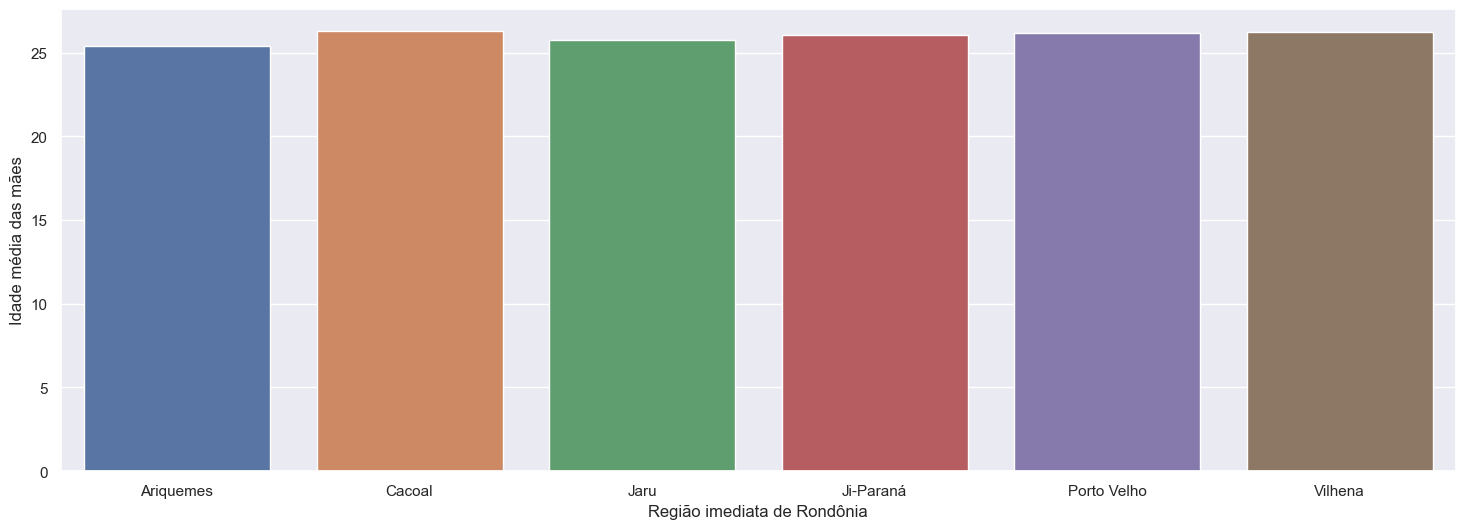

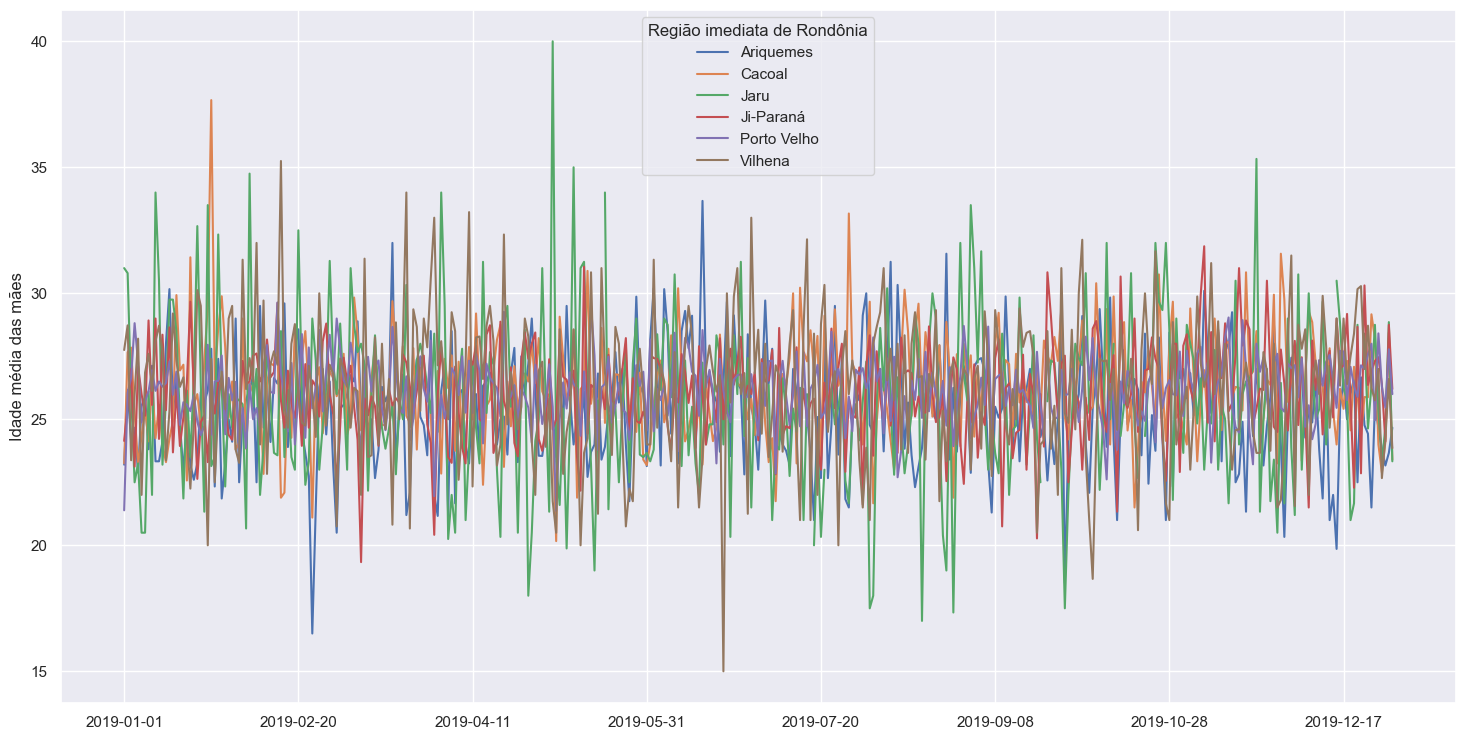

In [11]:
plt.subplots(figsize=(18,6))
sns.barplot(x='munResNome', 
            y='Idade média das mães', 
            data=sinasc_munResNome.groupby('munResNome').mean().reset_index());
plt.xlabel(xlabel='Região imediata de Rondônia')
plt.ylabel(ylabel='Idade média das mães')


sinasc_idademae_imediata['Idade média das mães'].plot(figsize=(18,9))
plt.xlabel(xlabel='')
plt.ylabel(ylabel='Idade média das mães');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M

In [12]:
idh = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari":  "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada D'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

sinasc_raw.set_index(
    ['munResNome']
# ).groupby(by=['munResNome', idh],   # Checando ortografia dos municípios
).groupby(by=[idh],
          dropna=False)[['CONTADOR']].count()

,CONTADOR
munResNome,
IDH-M alto,16855
IDH-M baixo,1826
IDH-M médio,8346
NaN,1


In [13]:
sinasc_munResNome = sinasc_raw.copy()

sinasc_idh = sinasc_munResNome[['munResNome',
                                'APGAR5', 'QTDGESTANT', 'CONSULTAS', 'IDADEMAE']]

sinasc_idh.set_index(keys='munResNome', 
                     inplace=True)

sinasc_idh.groupby(by=idh, 
                   dropna=False, 
                   sort=True
                  ).agg([('Qtd','count'), 
                         ('Mín','min'), 
                         ('Máx','max'), 
                         ('Mediana','median')]
                       ).rename(columns={'QTDGESTANT':'Número de gestações anteriores', 
                                         'CONSULTAS':'Número de consultas de pré-natal'})

APGAR5                     Número de gestações anteriores       \
               Qtd   Mín   Máx Mediana                            Qtd  Mín   
munResNome                                                                   
IDH-M alto   16794   0.0  10.0     9.0                          15827  0.0   
IDH-M baixo   1820   1.0  10.0     9.0                           1799  0.0   
IDH-M médio   8310   0.0  10.0     9.0                           8189  0.0   
NaN              1  10.0  10.0    10.0                              1  2.0   

                          Número de consultas de pré-natal                  \
              Máx Mediana                              Qtd Mín Máx Mediana   
munResNome                                                                   
IDH-M alto   14.0     1.0                            16855   1   9     4.0   
IDH-M baixo  11.0     1.0                             1826   1   9     4.0   
IDH-M médio  52.0     1.0                             8346   1   9     4.0   
NaN           2.0     2.0                                1   1   1     1.0   

            IDADEMAE                  
                 Qtd Mín Máx Mediana  
munResNome                            
IDH-M alto     16855  12  47    26.0  
IDH-M baixo     1826  13  46    25.0  
IDH-M médio     8346  11  53    25.0  
NaN                1  24  24    24.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM

In [14]:
ifdm = {
    "Ariquemes": "IFDM Desenvolvimento moderado",
    "Vilhena": "IFDM Desenvolvimento moderado",
    "Pimenta Bueno": "IFDM Desenvolvimento moderado",
    "Porto Velho": "IFDM Desenvolvimento moderado",
    "Ji-Paraná": "IFDM Desenvolvimento moderado",
    "Cacoal": "IFDM Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "IFDM Desenvolvimento moderado",
    "Rolim de Moura": "IFDM Desenvolvimento moderado",
    "Chupinguaia": "IFDM Desenvolvimento moderado",
    "São Miguel do Guaporé": "IFDM Desenvolvimento moderado",
    "Pimenteiras do Oeste": "IFDM Desenvolvimento moderado",
    "Teixeirópolis": "IFDM Desenvolvimento moderado",
    "Colorado do Oeste": "IFDM Desenvolvimento moderado",
    "Jaru": "IFDM Desenvolvimento moderado",
    "Rio Crespo": "IFDM Desenvolvimento moderado",
    "Primavera de Rondônia": "IFDM Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "IFDM Desenvolvimento moderado",
    "Ouro Preto do Oeste": "IFDM Desenvolvimento moderado",
    "São Francisco do Guaporé": "IFDM Desenvolvimento moderado",
    "Candeias do Jamari": "IFDM Desenvolvimento moderado",
    "Buritis": "IFDM Desenvolvimento moderado",
    "São Felipe D'Oeste": "IFDM Desenvolvimento moderado",
    "Presidente Médici": "IFDM Desenvolvimento moderado",
    "Cerejeiras": "IFDM Desenvolvimento moderado",
    "Monte Negro": "IFDM Desenvolvimento moderado",
    "Urupá": "IFDM Desenvolvimento moderado",
        
    "Espigão D'Oeste": "IFDM Desenvolvimento regular",
    "Seringueiras": "IFDM Desenvolvimento regular",
    "Alvorada D'Oeste": "IFDM Desenvolvimento regular",
    "Itapuã do Oeste": "IFDM Desenvolvimento regular",
    "Cabixi": "IFDM Desenvolvimento regular",
    "Novo Horizonte do Oeste": "IFDM Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "IFDM Desenvolvimento regular",
    "Vale do Paraíso": "IFDM Desenvolvimento regular",
    "Corumbiara": "IFDM Desenvolvimento regular",
    "Alto Paraíso": "IFDM Desenvolvimento regular",
    "Cacaulândia": "IFDM Desenvolvimento regular",
    "Vale do Anari": "IFDM Desenvolvimento regular",
    "Ministro Andreazza": "IFDM Desenvolvimento regular",
    "Costa Marques": "IFDM Desenvolvimento regular",
    "Nova União": "IFDM Desenvolvimento regular",
    "Guajará-Mirim": "IFDM Desenvolvimento regular",
    "Mirante da Serra": "IFDM Desenvolvimento regular",
    "Parecis": "IFDM Desenvolvimento regular",
    "Castanheiras": "IFDM Desenvolvimento regular",
    "Theobroma": "IFDM Desenvolvimento regular",
    "Machadinho D'Oeste": "IFDM Desenvolvimento regular",
    "Campo Novo de Rondônia": "IFDM Desenvolvimento regular",
    "Nova Mamoré": "IFDM Desenvolvimento regular",
    "Cujubim": "IFDM Desenvolvimento regular",
    "Alto Alegre dos Parecis": "IFDM Desenvolvimento regular",
    "Governador Jorge Teixeira": "IFDM Desenvolvimento regular",
}

sinasc_raw.set_index(
    ['munResNome']
# ).groupby(by=['munResNome', ifdm],   # Checando ortografia dos municípios
).groupby(by=[ifdm], 
          dropna=False)[['CONTADOR']].count()

,CONTADOR
munResNome,
IFDM Desenvolvimento moderado,21946
IFDM Desenvolvimento regular,5081
NaN,1


In [15]:
sinasc_ifdm = sinasc_munResNome[['munResNome',
                                 'APGAR5', 'QTDGESTANT', 'CONSULTAS', 'IDADEMAE']]

sinasc_ifdm.set_index(keys='munResNome', 
                      inplace=True)

sinasc_ifdm.groupby(by=[ifdm], 
                    dropna=False, 
                    sort=True
                   ).agg([('Qtd','count'), 
                         ('Mín','min'), 
                         ('Máx','max'), 
                         ('Mediana','median')]
                        ).rename(columns={'QTDGESTANT':'Número de gestações anteriores', 
                                         'CONSULTAS':'Número de consultas de pré-natal'})

APGAR5                      \
                                 Qtd   Mín   Máx Mediana   
munResNome                                                 
IFDM Desenvolvimento moderado  21867   0.0  10.0     9.0   
IFDM Desenvolvimento regular    5057   0.0  10.0     9.0   
NaN                                1  10.0  10.0    10.0   

                              Número de gestações anteriores             \
                                                         Qtd  Mín   Máx   
munResNome                                                                
IFDM Desenvolvimento moderado                          20806  0.0  14.0   
IFDM Desenvolvimento regular                            5009  0.0  52.0   
NaN                                                        1  2.0   2.0   

                                      Número de consultas de pré-natal      \
                              Mediana                              Qtd Mín   
munResNome                                                                   
IFDM Desenvolvimento moderado     1.0                            21946   1   
IFDM Desenvolvimento regular      1.0                             5081   1   
NaN                               2.0                                1   1   

                                          IDADEMAE                  
                              Máx Mediana      Qtd Mín Máx Mediana  
munResNome                                                          
IFDM Desenvolvimento moderado   9     4.0    21946  12  53    26.0  
IFDM Desenvolvimento regular    9     4.0     5081  11  52    25.0  
NaN                             1     1.0        1  24  24    24.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB

In [16]:
pib = {
    "Porto Velho": "PIB Acima de 1 Bilhão",
    "Ji-Paraná": "PIB Acima de 1 Bilhão",
    "Vilhena": "PIB Acima de 1 Bilhão",
    "Ariquemes": "PIB Acima de 1 Bilhão",
    "Cacoal": "PIB Acima de 1 Bilhão",
    "Jaru": "PIB Acima de 1 Bilhão",
    "Rolim de Moura": "PIB Acima de 1 Bilhão",
    "Pimenta Bueno": "PIB Acima de 1 Bilhão",

    "Guajará-Mirim": "PIB Acima de 500 Milhões",
    "Ouro Preto do Oeste": "PIB Acima de 500 Milhões",
    "Buritis": "PIB Acima de 500 Milhões",
    "Machadinho D'Oeste": "PIB Acima de 500 Milhões",
    "Espigão D'Oeste": "PIB Acima de 500 Milhões",
    "São Miguel do Guaporé": "PIB Acima de 500 Milhões",
    "Candeias do Jamari": "PIB Acima de 500 Milhões",
    "Nova Mamoré": "PIB Acima de 500 Milhões",
    "Cerejeiras": "PIB Acima de 500 Milhões",

    "Alta Floresta D'Oeste": "PIB Acima de 300 Milhões",
    "Presidente Médici": "PIB Acima de 300 Milhões",
    "Cujubim": "PIB Acima de 300 Milhões",
    "Nova Brasilândia D'Oeste": "PIB Acima de 300 Milhões",
    "Alto Paraíso": "PIB Acima de 300 Milhões",
    "São Francisco do Guaporé": "PIB Acima de 300 Milhões",
    "Colorado do Oeste": "PIB Acima de 300 Milhões",

    "Monte Negro": "PIB Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "PIB Acima de 200 Milhões",
    "Campo Novo de Rondônia": "PIB Acima de 200 Milhões",
    "Alvorada D'Oeste": "PIB Acima de 200 Milhões",

    "Chupinguaia": "PIB Acima de 100 Milhões",
    "Corumbiara": "PIB Acima de 100 Milhões",
    "Ministro Andreazza": "PIB Acima de 100 Milhões",
    "Urupá": "PIB Acima de 100 Milhões",
    "Costa Marques": "PIB Acima de 100 Milhões",
    "Seringueiras": "PIB Acima de 100 Milhões",
    "Mirante da Serra": "PIB Acima de 100 Milhões",
    "Governador Jorge Teixeira": "PIB Acima de 100 Milhões",
    "Theobroma": "PIB Acima de 100 Milhões",
    "Santa Luzia D'Oeste": "PIB Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "PIB Acima de 100 Milhões",
    "Itapuã do Oeste": "PIB Acima de 100 Milhões",
    "Vale do Paraíso": "PIB Acima de 100 Milhões",
    "Cacaulândia": "PIB Acima de 100 Milhões",
    "Cabixi": "PIB Acima de 100 Milhões",
    "Vale do Anari": "PIB Acima de 100 Milhões",

    "Nova União": "PIB Até 100 Milhões",
    "Parecis": "PIB Até 100 Milhões",
    "Rio Crespo": "PIB Até 100 Milhões",
    "Pimenteiras do Oeste": "PIB Até 100 Milhões",
    "Teixeirópolis": "PIB Até 100 Milhões",
    "São Felipe D'Oeste": "PIB Até 100 Milhões",
    "Castanheiras": "PIB Até 100 Milhões",
    "Primavera de Rondônia": "PIB Até 100 Milhões",
}

sinasc_raw.set_index(
    ['munResNome']
# ).groupby(by=['munResNome', pib],   # Checando ortografia dos municípios
).groupby(by=[pib], 
          dropna=False)[['CONTADOR']].count()

,CONTADOR
munResNome,
PIB Acima de 1 Bilhão,17736
PIB Acima de 100 Milhões,1952
PIB Acima de 200 Milhões,724
PIB Acima de 300 Milhões,1880
PIB Acima de 500 Milhões,4304
PIB Até 100 Milhões,431
NaN,1


In [17]:
sinasc_pib = sinasc_munResNome[['munResNome',
                                'APGAR5', 'QTDGESTANT', 'CONSULTAS', 'IDADEMAE']]

sinasc_pib.set_index(keys='munResNome', 
                     inplace=True)

sinasc_pib.groupby(by=pib, 
                   dropna=False, 
                   sort=True
                  ).agg([('Qtd','count'), 
                         ('Mín','min'), 
                         ('Máx','max'), 
                         ('Mediana','median')]
                       ).rename(columns={'QTDGESTANT':'Número de gestações anteriores', 
                                         'CONSULTAS':'Número de consultas de pré-natal'})

APGAR5                      \
                            Qtd   Mín   Máx Mediana   
munResNome                                            
PIB Acima de 1 Bilhão     17675   0.0  10.0     9.0   
PIB Acima de 100 Milhões   1944   1.0  10.0     9.0   
PIB Acima de 200 Milhões    724   1.0  10.0     9.0   
PIB Acima de 300 Milhões   1878   0.0  10.0     9.0   
PIB Acima de 500 Milhões   4272   0.0  10.0     9.0   
PIB Até 100 Milhões         431   0.0  10.0     9.0   
NaN                           1  10.0  10.0    10.0   

                         Número de gestações anteriores                     \
                                                    Qtd  Mín   Máx Mediana   
munResNome                                                                   
PIB Acima de 1 Bilhão                             16702  0.0  14.0     1.0   
PIB Acima de 100 Milhões                           1920  0.0  52.0     1.0   
PIB Acima de 200 Milhões                            710  0.0   9.0     1.0   
PIB Acima de 300 Milhões                           1868  0.0   9.0     1.0   
PIB Acima de 500 Milhões                           4187  0.0  14.0     1.0   
PIB Até 100 Milhões                                 428  0.0   7.0     1.0   
NaN                                                   1  2.0   2.0     2.0   

                         Número de consultas de pré-natal                  \
                                                      Qtd Mín Máx Mediana   
munResNome                                                                  
PIB Acima de 1 Bilhão                               17736   1   9     4.0   
PIB Acima de 100 Milhões                             1952   1   9     4.0   
PIB Acima de 200 Milhões                              724   1   4     4.0   
PIB Acima de 300 Milhões                             1880   1   9     4.0   
PIB Acima de 500 Milhões                             4304   1   9     4.0   
PIB Até 100 Milhões                                   431   1   4     4.0   
NaN                                                     1   1   1     1.0   

                         IDADEMAE                  
                              Qtd Mín Máx Mediana  
munResNome                                         
PIB Acima de 1 Bilhão       17736  12  47    26.0  
PIB Acima de 100 Milhões     1952  12  52    25.0  
PIB Acima de 200 Milhões      724  13  44    25.0  
PIB Acima de 300 Milhões     1880  11  53    25.0  
PIB Acima de 500 Milhões     4304  13  53    25.0  
PIB Até 100 Milhões           431  14  41    26.0  
NaN                             1  24  24    24.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- As análises dos fatores geográficos, como latitude, longitude, altitude e área do município, não apresentaram influência significativa na qualidade da gestação, no parto e na saúde dos bebês.

- Durante todo o ano de 2019, a idade média das mães permaneceu constante, situando-se na faixa dos 25 anos, independentemente da região imediata do estado.

- O Índice de Desenvolvimento Humano (IDH), o Índice FIRJAN de Desenvolvimento Municipal (IFDM) e o Produto Interno Bruto (PIB) não apresentaram impacto considerável na pontuação do teste APGAR no quinto minuto, no número de gestações anteriores, no número de consultas de pré-natal ou na idade das mães.

---

# [**Dicionário de variáveis**](https://github.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/blob/main/Mo%CC%81dulo%2009%20-%20TdD%20III%20-%20Agregac%CC%A7o%CC%83es%20e%20operac%CC%A7o%CC%83es%20em%20grupos/database/dict_SINASC.csv) numéricas:

In [18]:
sinasc_dict = pd.read_csv('https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/Mo%CC%81dulo%2009%20-%20TdD%20III%20-%20Agregac%CC%A7o%CC%83es%20e%20operac%CC%A7o%CC%83es%20em%20grupos/database/dict_SINASC.csv')
sinasc_dict[sinasc_dict.type != 'text']

,id,type,description
0,NUMERODN,bigint,"Número da DN, sequencial por UF informante e p..."
2,ORIGEM,bigint,NaN
3,NUMERODV,bigint,Número do Dígito Verificador
4,PREFIXODN,bigint,Prefixo da DN
6,CODMUNNASC,bigint,"Município de ocorrência, em codificação idênti..."
7,LOCNASC,bigint,"Local de ocorrência do nascimento, conforme a ..."
9,IDADEMAE,bigint,Idade da mãe em anos
10,ESTCIVMAE,bigint,"Estado civil, conforme a tabela:\n1: Solteira\..."
12,ESCMAE,bigint,"Escolaridade, anos de estudo concluídos:\n1: N..."
17,CODMUNRES,bigint,"Município de residência da mãe, em codificação..."


---